# **Importing the library & dependencies **

In [ ]:
!pip install google-colab
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
# dataset='/content/drive/MyDrive/Colab Notebooks/Delhi.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bengaluru_House_Data.csv')  #https://drive.google.com/file/d/15a1TrnNq7ao5-uFf8VgrxK0aYNGHnglk/view?usp=drive_link

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
print(df)    #seeing the overview of data set
print("**************************************************************************************************************")
print(df.info())

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Be

In [ ]:
df.shape

(13320, 9)

## **Data Cleaning**

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.drop(columns=['society','area_type','availability','balcony'],inplace=True)  #dropped society as it was very much null more than 5000 entries were missing && area_type,availability ,balcony weren't much good for the prediction

In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df.shape

(13320, 5)

 ***filling up missing values***

In [ ]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [ ]:
# there is only 1 missing (null)location entry so i m gonna drop that row
df['location']=df['location'].fillna('Sarjapur  Road')

In [ ]:
#now for the null val of 'Size' column
df['size'].value_counts()


size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [ ]:
#as there are max number of 2 BHK type size so replace the null values with 2BHk

df=df.fillna({'size':'2 BHK'})

In [ ]:
#now we deal with the missing values of the bathrooms 'bath'
df=df.fillna({'bath':df['bath'].median()})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


**Resolving for location**

In [ ]:
df['location'].value_counts() #if we sum up all the locations so its 13319 its due to the fact that the spaces in the particular address is being counted individually

location
Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [ ]:
#so removing the spaces between the address of the particular location

df['location'] = df['location'].apply(lambda x:x.strip())
total_location=df['location'].value_counts()

In [ ]:
location_less_than_10 = total_location[df['location'].value_counts()<=10]
location_less_than_10   #checking for the number  location less than <=10 which is 1053

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [ ]:
df['location']=df['location'].apply(lambda x : 'other' if x in location_less_than_10 else x)

In [ ]:
df['location'].value_counts()  #reduced the location from 1300 something to 242

location
other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [ ]:
df['BHK']=df['size'].str.split().str.get(0).astype(int)

In [ ]:
df.drop(columns=['size'],inplace=True)

In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convertt(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df['total_sqft']=df['total_sqft'].apply(convertt)

In [ ]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


**Price per sq ft**

In [ ]:
df['Price_Per_sqft']=df['price']*100000/df['total_sqft']

In [ ]:
df['Price_Per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: Price_Per_sqft, Length: 13320, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13320 non-null  object 
 1   total_sqft      13274 non-null  float64
 2   bath            13320 non-null  float64
 3   price           13320 non-null  float64
 4   BHK             13320 non-null  int64  
 5   Price_Per_sqft  13274 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 624.5+ KB


# **Removing Outliers**

In [ ]:
df.describe()

,total_sqft,bath,price,BHK,Price_Per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
#min	1.000000	1.000000	8.000000	1.000000
#which is wierd , no flat can be of 1 sq feet (its an outlier)


In [ ]:
(df['total_sqft']/df['BHK']).describe() #total_sqft/BHK

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [ ]:
#min          0.250000  ;  so this is an outlier

df=df[((df['total_sqft']/df['BHK'])>=300)]
df.describe()

,total_sqft,bath,price,BHK,Price_Per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
df.shape

(12530, 6)

In [ ]:
df['Price_Per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_Per_sqft, dtype: float64

In [ ]:
#max      176470.588235  ,its an outlier

In [ ]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()  #empty dataframe
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.Price_Per_sqft)
    st=np.std(subdf.Price_Per_sqft)
    gen_df = subdf[(subdf.Price_Per_sqft>(m-st)) & (subdf.Price_Per_sqft<=(m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,BHK,Price_Per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [ ]:

def bhk_outlier_remover(df):
   exclude_indices = np.array([])
   for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_sqft),
                'std': np.std(bhk_df.Price_Per_sqft),
                'count': bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('BHK'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_sqft<(stats['mean'])].index.values)
   return df.drop(exclude_indices,axis='index')


In [ ]:
df=bhk_outlier_remover(df)
df.shape

(7360, 6)

In [ ]:
df.drop(columns=['Price_Per_sqft'],inplace=True)

In [ ]:
df.to_csv("Cleaned_data.csv")

In [ ]:
x=df.drop('price',axis=1)
y=df['price']

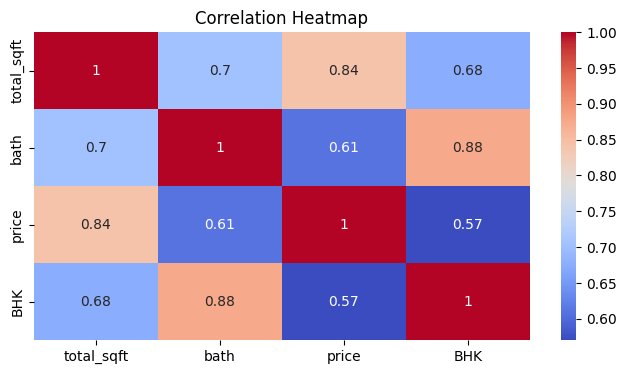

In [ ]:
numerical_df = df.select_dtypes(include=['float', 'int'])

plt.figure(figsize=(8, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Train Test Split for modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer  # Import make_column_transformer
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5888, 4)
(1472, 4)
(5888,)
(1472,)


One Hot Encoder for 'location' column

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [ ]:
scaler=StandardScaler()

# **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Assuming column_trans and scaler are defined elsewhere

# Instantiate the Lasso model with a descriptive variable name
lasso_model = Lasso()

# Create the pipeline
pipe = make_pipeline(column_trans, scaler, lasso_model)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred_L = pipe.predict(x_test)

# Evaluate the model
r2_score(y_test, y_pred_L)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.780009813477953

# **Linear Rrgression**

In [ ]:
lr=LinearRegression( )

In [ ]:
pipe=make_pipeline(column_trans,scaler,lr)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr=pipe.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_lr)

0.7871262434382867

# **Neural Network Regressor**

In [ ]:
from sklearn.neural_network import MLPRegressor

# Assuming column_trans and scaler are defined elsewhere

# Instantiate the MLPRegressor model
nn_model = MLPRegressor(hidden_layer_sizes=(1000,), activation='relu', solver='adam')

# Create the pipeline
pipe = make_pipeline(column_trans, scaler, nn_model)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred_nn = pipe.predict(x_test)

# Evaluate the model
r2_score(y_test, y_pred_nn)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.85716072414627

# **MODEL EVALUATION**

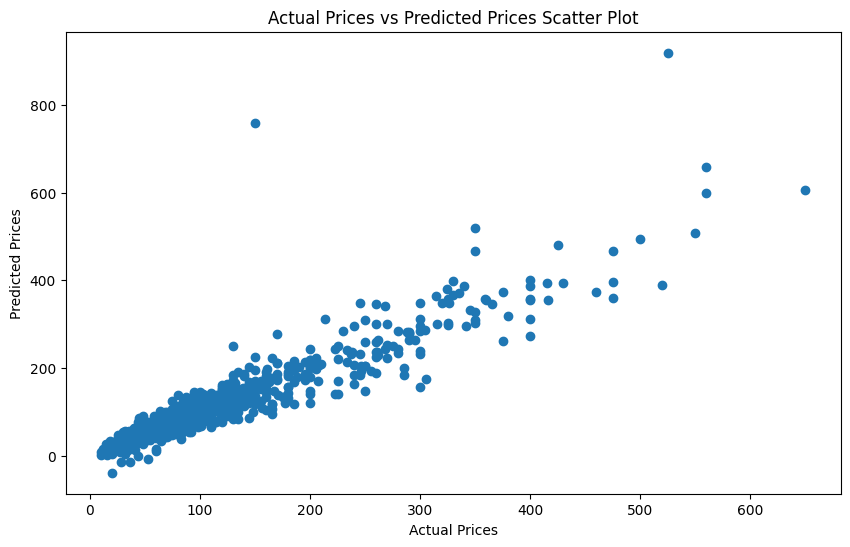

In [ ]:
plt.figure(figsize=(10, 6))          #
plt.scatter(y_test, y_pred_nn)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices Scatter Plot")
plt.show()

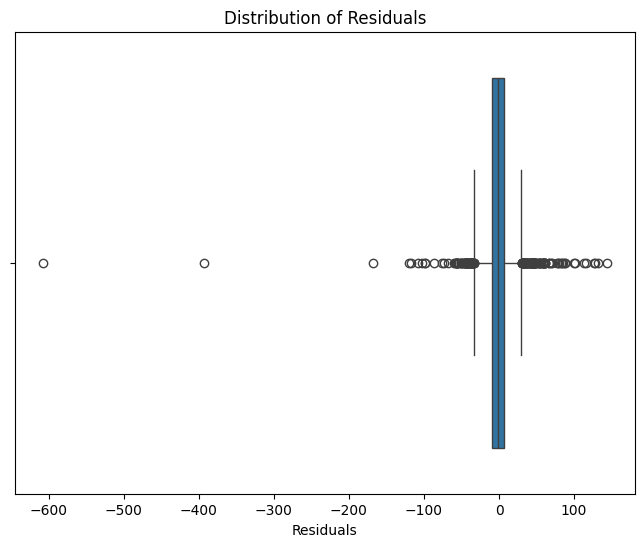

In [ ]:
residuals = y_test - y_pred_nn
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# **Testing**

In [ ]:
x_train['location']


2195     Electronic City Phase II
6044                     Sarjapur
1720              Cunningham Road
2033              Electronic City
9976                        other
                   ...           
4273                 Kasavanhalli
1616                 Channasandra
5693        Raja Rajeshwari Nagar
10154                       other
1546                   Chandapura
Name: location, Length: 5888, dtype: object

In [ ]:
def funcc(location,sqft,bhk,bath):
    input = pd.DataFrame([[location,sqft,bhk,bath]],columns=['location','total_sqft','BHK','bath'])
    return pipe.predict(input)[0]

In [ ]:
l=input("Enter the address :")
sqft=int(input("Enter the sqft :"))
bhk=int(input("Enter the BHK :"))
bath=int(input("Enter the bath :"))

price = funcc(l,sqft, bhk, bath)
print("PREDICTED PRICE :",price,"Lakhs")

Enter the address :EPIP Zone
Enter the sqft :2000
Enter the BHK :4
Enter the bath :4
PREDICTED PRICE : 137.40351475566382 Lakhs
